In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
from kid_readout.interactive import *

INFO     2017-01-10 12:46:05,491 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [4]:
from kid_readout.measurement import mmw_source_sweep

In [5]:
files = glob.glob('/artemis/readout/2017-01-09_*.nc')
files += glob.glob('/artemis/readout/2017-01-10_*.nc')

files.sort()

In [6]:
len(files)

512

In [7]:
def get_df(fn):
    try:
        ncf = NCFile(fn)
#        print fn
        ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray2)
        return ssa.to_dataframe()    
    except Exception as e:
#        print "bad:",fn,e
        return None

In [8]:
import joblib

In [9]:
pp = joblib.Parallel(n_jobs=20,verbose=5)
rows = pp([joblib.delayed(get_df)(fn) for fn in files])

[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:   29.2s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:  1.6min
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed:  3.2min
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:  5.4min
[Parallel(n_jobs=20)]: Done 512 out of 512 | elapsed:  6.7min finished


In [10]:
rows = [row for row in rows if row is not None]

In [11]:
import pandas as pd

In [12]:
df = pd.concat(rows,ignore_index=True)
df.shape

(2040, 77)

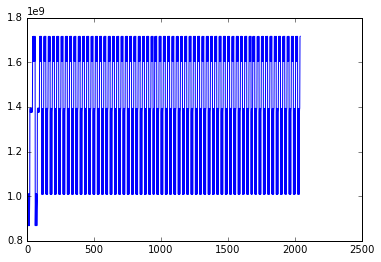

In [13]:
plot(df.res_f_0)

(0, 256)

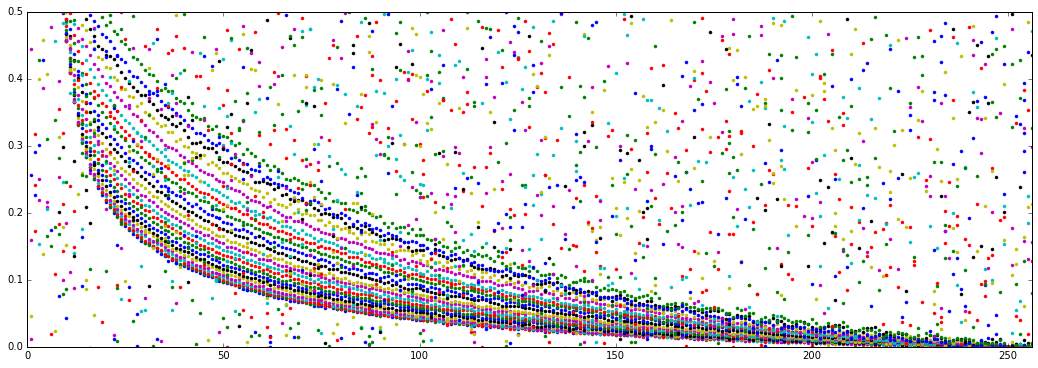

In [14]:
figure(figsize=(18,6))
dd = df[(df.number==0) & (df.roach_dac_attenuation==10) & (df.sweep_cold_1550nm_led_current==100e-6)]
for k,row in dd.iterrows():
    if row.res_f_0 < 1010e6 and row.res_f_0 > 1000e6:
        #plot(row.res_frequency_data,dB(row.res_s21_data))
        y = row.folded_x
        if y[128] > y[400]:
            y = np.roll(y,256)
        y = y-y[250]
        y = y/y[0]
        plot(y,'.')
ylim(0,.5)
xlim(0,256)

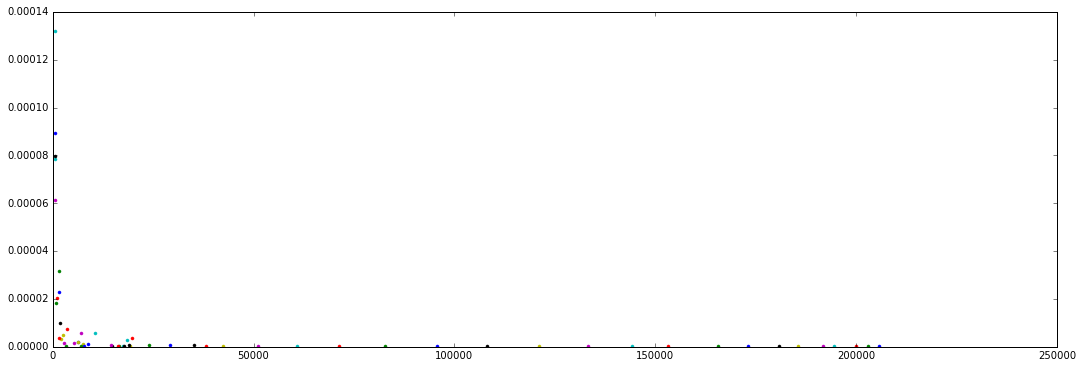

In [15]:
figure(figsize=(18,6))
dd = df[(df.number==0) & (df.roach_dac_attenuation==10) & (df.sweep_cold_1550nm_led_current==100e-6)]
for k,row in dd.iterrows():
    if row.res_f_0 < 1010e6 and row.res_f_0 > 1000e6:
        #plot(row.res_frequency_data,dB(row.res_s21_data))
        y = row.folded_x
        if y[128] > y[400]:
            y = np.roll(y,256)
        y = y-y.min()
        #plot(y)
        plot(row.res_Q_i,y[100],'.')

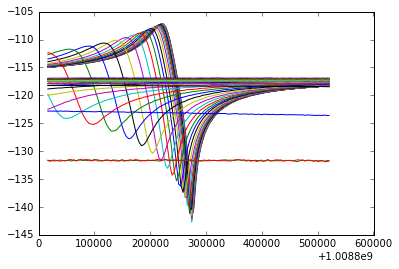

In [16]:
for k,row in dd.iterrows():
    if row.res_f_0 < 1010e6 and row.res_f_0 > 1000e6:
        plot(row.res_frequency_data,dB(row.res_s21_data))

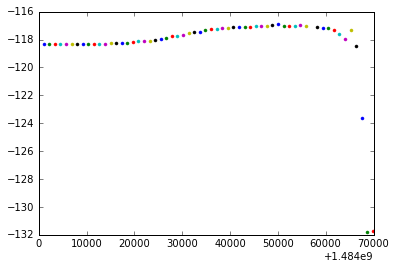

In [17]:
for k,row in dd.iterrows():
    if row.res_f_0 < 1010e6 and row.res_f_0 > 1000e6:
        plot(row.start_epoch,dB(row.res_s21_data[-1]),'.')

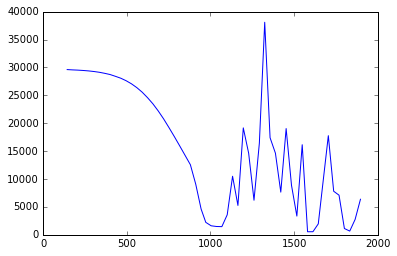

In [24]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==10) & (df.sweep_cold_1550nm_led_current==100e-6)
       & (dd.res_f_0<1010e6) & (dd.res_f_0>1000e6)]
plot(dd.res_Q)

In [19]:
import time

In [20]:
time.ctime(dd.start_epoch.max())

'Tue Jan 10 11:30:12 2017'

In [17]:
filename = files[0+0*4]
print filename
ncf = NCFile(filename)

/artemis/readout/2017-01-09_162718_6_dB_dac.nc


In [18]:
ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray2)

In [8]:
ss = ssa.sweep_stream(1)

In [19]:
df=ssa.to_dataframe()

In [22]:
df.columns

Index([                                u'S_counts',
                                    u'S_frequency',
                                           u'S_xx',
                                  u'S_xx_variance',
                                           u'S_xy',
                                           u'S_yy',
                                  u'S_yy_variance',
                                 u'analysis_epoch',
                          u'folded_normalized_s21',
                                       u'folded_q',
                                       u'folded_x',
                                         u'number',
                                      u'res_A_mag',
                                u'res_A_mag_error',
                                    u'res_A_slope',
                              u'res_A_slope_error',
                                          u'res_Q',
                                        u'res_Q_e',
                                   u'res_Q_e_imag',
            

In [23]:
df.stream_cold_1550nm_led_current

0    0.00001
1    0.00001
2    0.00001
3    0.00001
Name: stream_cold_1550nm_led_current, dtype: float64

(-5, 20)

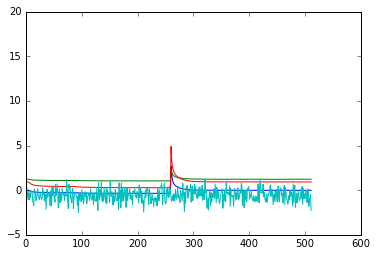

In [20]:
for k,row in df.iterrows():
    plot(1e6*row.folded_x-row.folded_x.min())
ylim(-5,20)

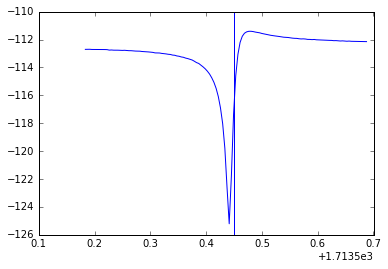

In [258]:
plot(ss.sweep.frequency_MHz,dB(ss.sweep.s21_point))
axvline(ss.stream.frequency_MHz)

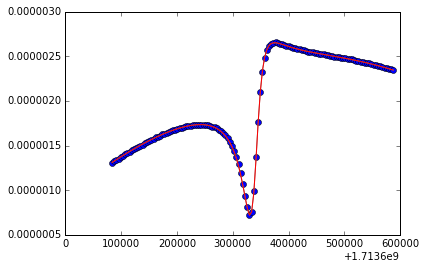

In [224]:
_=ss.resonator.plot()

In [119]:
(1392+1009)/2.

1200.5

In [116]:
(100e-6*2.5)/1e-6

250.00000000000003

In [225]:
ss.resonator.Q

52809.364345043352

In [242]:
ss.x_raw.max()

9.0341846e-06

In [243]:
ss.x.max()

2.772807e-06

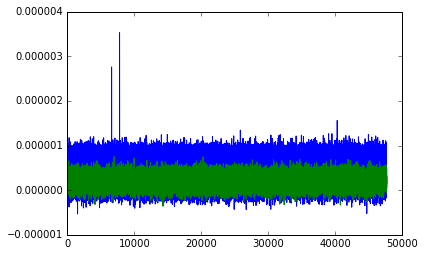

In [259]:
plot(ss.x_raw[ss.glitch_mask])
plot(ss.x[np.roll(ss.glitch_mask,100)])


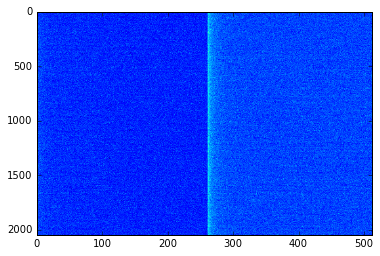

In [265]:
imshow((ss.x_raw.reshape((-1,512))),aspect='auto')

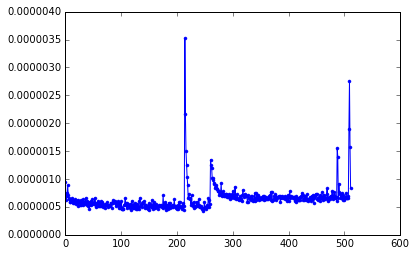

In [266]:
plot(ss.x_raw.reshape((-1,512)).max(0),'.-')
#plot(ss.x.reshape((-1,512)).mean(0),'.-')

#plot(ss.y.reshape((-1,512)).mean(0))

In [228]:
xf = ss.x.reshape((-1,512)).mean(0)
t = np.arange(512)*2**14/512e6

(-1e-06, 1.5e-06)

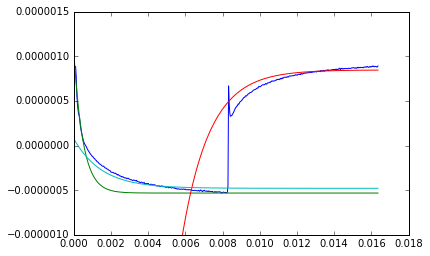

In [229]:
plot(t,xf)
plot(t,1.1*xf.ptp()*np.exp(-t/500e-6)+xf.min())
plot(t,-5e-7*np.exp(-(t-7.8e-3)/1500e-6)+xf.max()*0.95)
plot(t,0.2*xf.ptp()*np.exp(-(t-1e-3)/1500e-6)+xf.min()*.9)
ylim(-1e-6,1.5e-6)
#plot(t,0.2*xf.ptp()*np.exp(-(t-1e-3)/1500e-6)+xf.min()*.9+.8*xf.ptp()*np.exp(-t/500e-6))

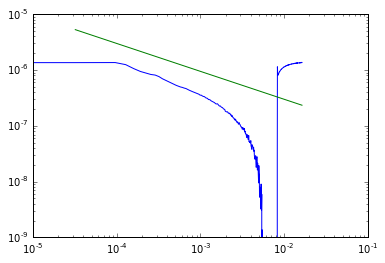

In [230]:
plot(t,xf-xf.min()*0.9)
plot(t,3e-8*(t**-0.5))
xscale('log')
yscale('log')
#ylim(0e-6,2e-6)
#plot(t,0.2*xf.ptp()*np.exp(-(t-1e-3)/1500e-6)+xf.min()*.9+.8*xf.ptp()*np.exp(-t/500e-6))

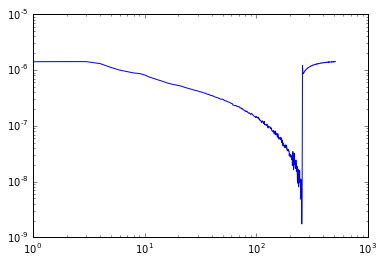

In [231]:
loglog(xf-xf.min())

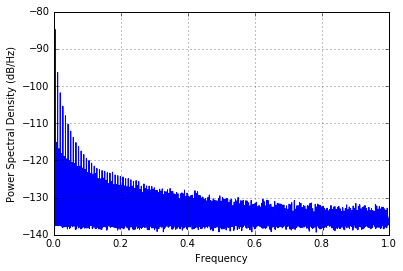

In [233]:
_=psd(ss.x,NFFT=2**15)

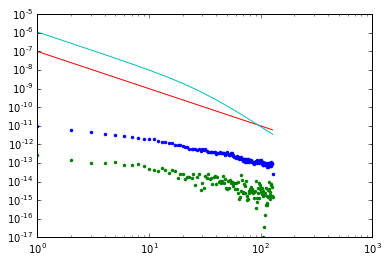

In [234]:
f = np.arange(0,129,dtype='float')
loglog(f,np.abs(np.fft.rfft(ss.x.reshape((-1,256)).mean(0)))**2,'.')
loglog(f,np.abs(np.fft.rfft(ss.y.reshape((-1,256)).mean(0)))**2,'.')

loglog(f,1e-7/f**2)
loglog(f,1e-3*np.abs(f**-1/(30+1j*f))**2)

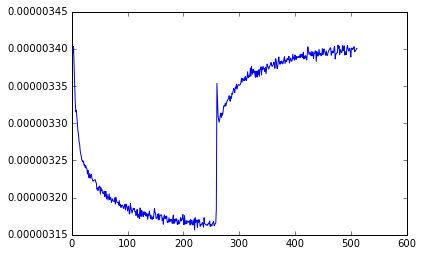

In [237]:
plot(ss.y.reshape((-1,512)).mean(0))

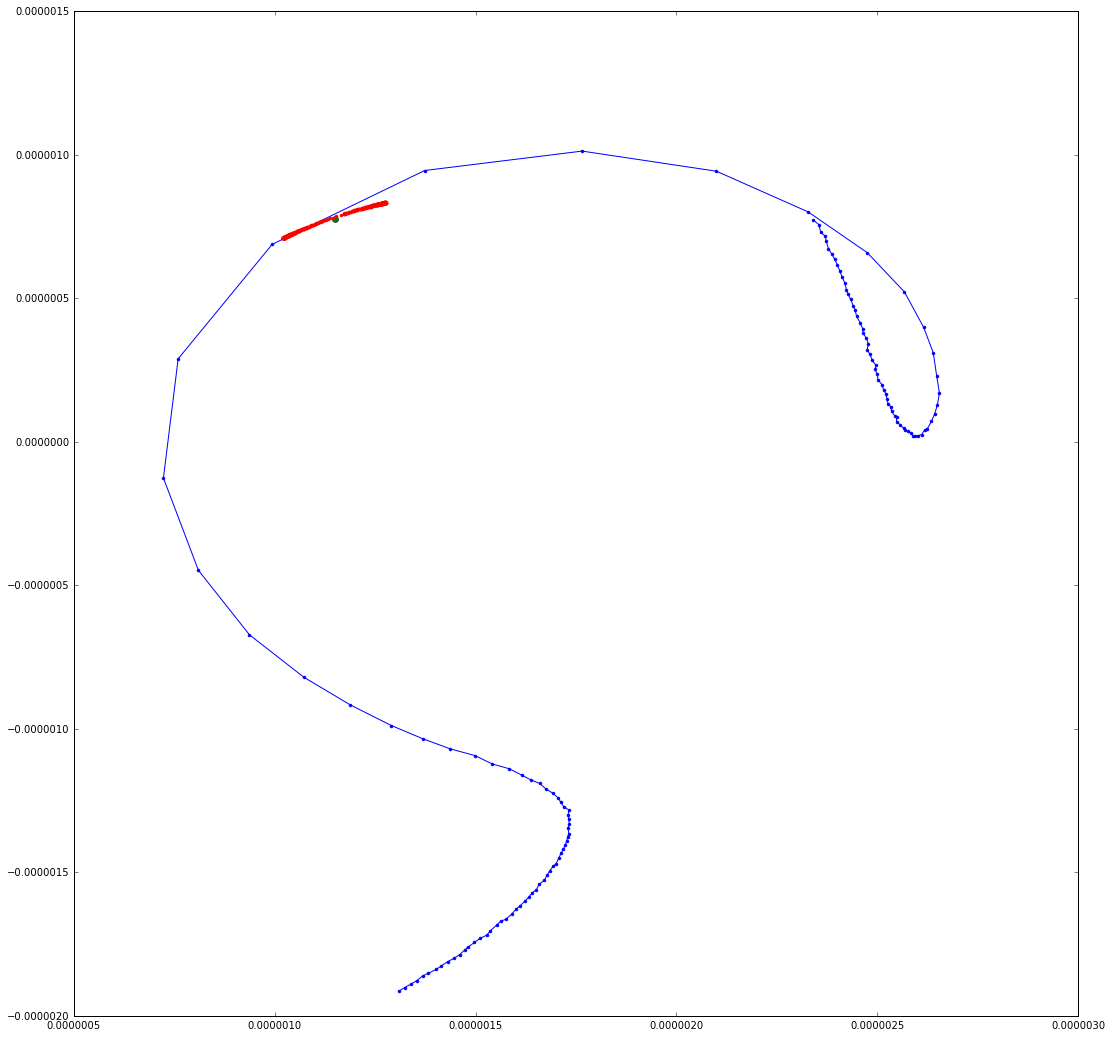

In [236]:
figure(figsize=(18,18))
plot_ri(ss.sweep.s21_point,'.-')
plot_ri(ss.stream.s21_point,'o')
#plot_ri(ss.stream.s21_raw,',')
plot_ri(ss.stream.s21_raw.reshape((-1,512)).mean(0),'.')


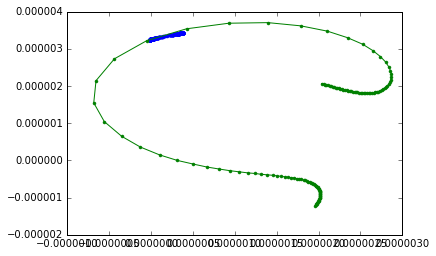

In [219]:
plot_ri(ss.stream.s21_raw.reshape((-1,512)).mean(0),'.')
plot_ri(ss.sweep.s21_point,'.-')